# Plots for validated Data 

In [1]:
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
import numpy as np
import pandas as pd
from pandas import json_normalize
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white", context="paper", rc={"text.usetex": True, "font.family": "Times New Roman"})
def configure_axes(ax):
    def set_x_label(label, size=18, labelpad=5):
        ax.set_xlabel(label, size=size, labelpad=labelpad, loc="right", fontname='serif')
    def set_y_label(label, size=18, labelpad=5):
        ax.set_ylabel(label, size=size, labelpad=labelpad, loc="top", fontname='serif')
    ax.set_x_label = set_x_label
    ax.set_y_label = set_y_label
    ax.minorticks_on() 
    ax.tick_params(direction='in', length=10, width=1.1, colors='black', which='major', top=True, right=True)
    ax.tick_params(direction='in', length=5, width=0.6, colors='black', which='minor', top=True, right=True)
    ax.xaxis.set_ticks_position('both')
    ax.yaxis.set_ticks_position('both')
    for spine in ['left', 'right', 'top', 'bottom']:
        ax.spines[spine].set_linewidth(1.2)
    sns.despine(left=False, bottom=False, right=False, top=False, offset=None, trim=False)
    ax.tick_params(axis='x', labelcolor='black', labelsize=16)
    ax.tick_params(axis='y', labelcolor='black', labelsize=16)
def configure_cbar(cbar, label, size=20, labelpad=5):
    cbar.set_label(label, size=size, labelpad=labelpad, fontname='serif')
    cbar.ax.tick_params(labelsize=18)
    for spine in cbar.ax.spines.values():
        spine.set_linewidth(1.2)
from scipy.interpolate import griddata
from scipy.interpolate import interp1d



In [2]:
data_exp = pd.read_pickle('../orig/mg5/ULnew_exp.pcl')
data_obs = pd.read_pickle('../orig/mg5/ULnew_obs.pcl')
data_exp_df = pd.DataFrame(data_exp)
data_obs_df = pd.DataFrame(data_obs)
#data_exp = data_exp_df.iloc[:-3]
#data_obs = data_obs_df.iloc[:-2]
MY1_Obs= data_obs['my1 [GeV]'].values
MY1_Exp = data_exp['my1 [GeV]'].values
gqExp = data_exp['gaq'].values
gqObs = data_obs['gaq'].values
xsecExp_pb = data_exp['weight [pb]'].values
xsecObs_pb = data_obs['weight [pb]'].values
xsecExp_fb = [x * 1000 for x in xsecExp_pb]
xsecObs_fb = [x * 1000 for x in xsecObs_pb]
MY1_Obs = np.array(MY1_Obs)
gqObs = np.array(gqObs)
xsecObs_fb = np.array(xsecObs_fb)
xsecExp_fb = np.array(xsecExp_fb)
xsecExp_fb
#xsecObs_fb
MY1_Obs

array([1500.   , 1668.754, 1845.511, 2000.   , 2222.686, 2500.   ,
       2645.79 , 2816.98 , 3000.   , 3215.031, 3389.005, 3500.   ])

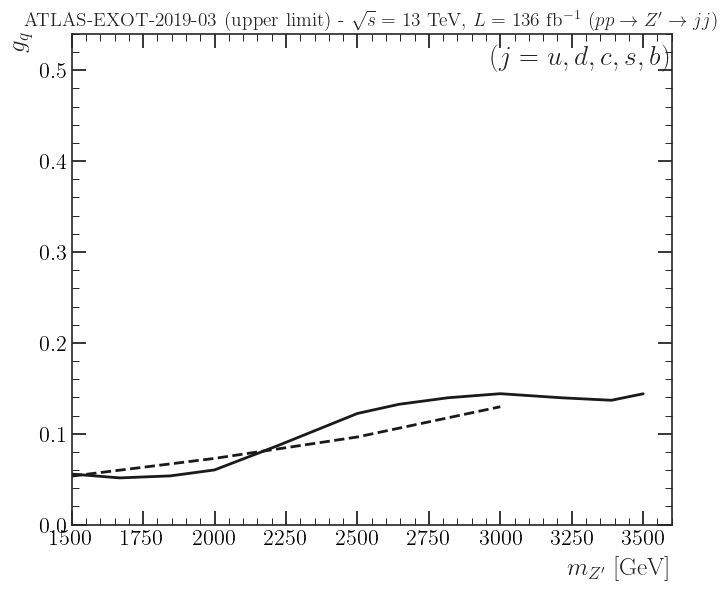

In [3]:
fig, ax = plt.subplots(figsize=(7, 6))
configure_axes(ax)
observed_line, = ax.plot(MY1_Obs, gqObs, 'k', linewidth=2, label='exclusion (official)')
expected_line, = ax.plot(MY1_Exp, gqExp, 'k--', linewidth=2, label='exp. excl. (official)')
ax.set_x_label(r'$m_{Z^{\prime}}$ [GeV]')
ax.set_y_label(r'$g_{q}$')
plt.xlim(1500, 3600)
plt.ylim(0.0, 0.54)
plt.title(r'ATLAS-EXOT-2019-03 (upper limit) -  $\sqrt{s} = 13$ TeV, $L = 136$ fb$^{-1}$  ($ p p \to Z^{\prime} \to j j$)', fontsize=14) 
ax.set_y_label(r'$g_{q}$')
plt.text(0.85, 0.95, r'($j=u,d,c,s,b$)', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes, fontsize=20)
plt.tight_layout()
plt.show()

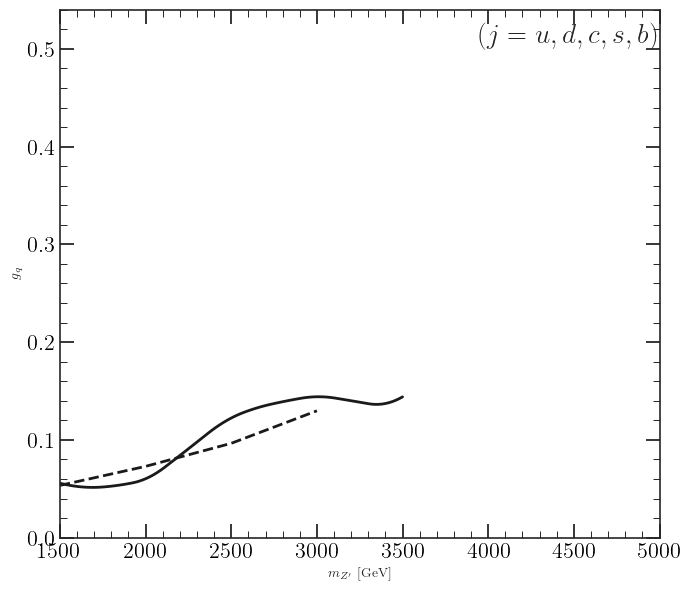

In [4]:
interp_obs = interp1d(MY1_Obs, gqObs, kind='quadratic')
interp_exp = interp1d(MY1_Exp, gqExp, kind='linear')
MY1_dense2 = np.linspace(1500, 3000, 100)
MY1_dense = np.linspace(1500, 3500, 100)
gqObs_dense = interp_obs(MY1_dense)
gqExp_dense = interp_exp(MY1_dense2)
fig, ax = plt.subplots(figsize=(7, 6))
configure_axes(ax)
ax.set_xlabel(r'$m_{Z^{\prime}}$ [GeV]')
ax.set_ylabel(r'$g_{q}$')
plt.xlim(1500, 5000)
plt.ylim(0.0, 0.54)
plt.text(0.85, 0.95, r'($j=u,d,c,s,b$)', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize=20)
observed_line, = ax.plot(MY1_dense, gqObs_dense, 'k', linewidth=2, label='exclusion (official)')
expected_line, = ax.plot(MY1_dense2, gqExp_dense, 'k--', linewidth=2, label='exp. excl. (official)')
plt.tight_layout()
plt.show()


In [5]:
dataDF = pd.read_pickle('TRV1jj_data.pcl')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 8)
pd.set_option('display.float_format', '{:e}'.format)
dataDF

,filename,mass.5000001,mass.5000521,width.5000001,width.5000521,extpar.1,extpar.2,extpar.3,extpar.4,xsec13TeV(fb).5000001,"BRs.y1.q,q","BRs.y1.c,c","BRs.y1.b,b","BRs.y1.t-,t+",totalxsec13TeV(fb),totalxsec8TeV(fb),SMS Decomposition,Total xsec for missing topologies (fb),Total xsec for missing topologies with displaced decays (fb),Total xsec for missing topologies with prompt decays (fb),Total xsec for topologies outside the grid (fb),OutputStatus.sigmacut,OutputStatus.minmassgap,OutputStatus.maxcond,OutputStatus.ncpus,OutputStatus.model,OutputStatus.promptwidth,OutputStatus.stablewidth,OutputStatus.eraseprompt,OutputStatus.checkinput,OutputStatus.doinvisible,OutputStatus.docompress,OutputStatus.computestatistics,OutputStatus.testcoverage,OutputStatus.combinesrs,OutputStatus.reportallsrs,OutputStatus.experimentalfeatures,OutputStatus.file status,OutputStatus.decomposition status,OutputStatus.warnings,OutputStatus.input file,OutputStatus.database version,OutputStatus.smodels version,ExptRes.result0.maxcond,ExptRes.result0.theory prediction (fb),ExptRes.result0.upper limit (fb),ExptRes.result0.expected upper limit (fb),ExptRes.result0.TxNames,ExptRes.result0.Mass (GeV),ExptRes.result0.AnalysisID,ExptRes.result0.DataSetID,ExptRes.result0.AnalysisSqrts (TeV),ExptRes.result0.lumi (fb-1),ExptRes.result0.dataType,ExptRes.result0.r,ExptRes.result0.r_expected,ExptRes.result0.Width (GeV)
0,run_01_MZp_1500_gAq_4.000000E-02.slha,1.500000e+03,1.000000e+04,1.131036e-01,0.000000e+00,0.000000e+00,1.500000e+00,4.000000e-02,0.000000e+00,7.172289e+01,1.688592e-01,1.688585e-01,1.688493e-01,1.557145e-01,7.172289e+01,0.000000e+00,"[{'ID': 1, 'SMS': '(PV > y1)', 'Masses (GeV)':...",1.116829e+01,0.000000e+00,7.172288e+01,0.000000e+00,0.000000e+00,50,2.000000e-01,1,TRV1jj_slha/run_01_MZp_1500_gAq_4.000000E-02.slha,1.000000e+00,1.000000e-25,"eCharge,colordim",True,True,True,True,True,False,False,False,1,1,Input file ok,TRV1jj_slha/run_01_MZp_1500_gAq_4.000000E-02.slha,3.0.0-beta,3.0.0-beta,0.000000e+00,6.055459e+01,1.172950e+02,1.079320e+02,[TRV1jj],"[(y1, 1500.0)]",ATLAS-EXOT-2019-03,None,1.300000e+01,1.390000e+02,upperLimit,5.162589e-01,5.610439e-01,"[(y1, 0.1131)]"
1,run_83_MZp_2000_gAq_8.200000E-02.slha,2.000000e+03,1.000000e+04,6.373773e-01,0.000000e+00,0.000000e+00,1.500000e+00,8.200000e-02,0.000000e+00,7.108620e+01,1.679002e-01,1.678998e-01,1.678947e-01,1.605049e-01,7.108620e+01,0.000000e+00,"[{'ID': 1, 'SMS': '(PV > y1)', 'Masses (GeV)':...",1.140968e+01,0.000000e+00,7.108620e+01,0.000000e+00,0.000000e+00,50,2.000000e-01,1,TRV1jj_slha/run_01_MZp_1500_gAq_4.000000E-02.slha,1.000000e+00,1.000000e-25,"eCharge,colordim",True,True,True,True,True,False,False,False,1,1,Input file ok,TRV1jj_slha/run_83_MZp_2000_gAq_8.200000E-02.slha,3.0.0-beta,3.0.0-beta,0.000000e+00,5.967652e+01,3.215460e+01,4.719660e+01,[TRV1jj],"[(y1, 2000.0)]",ATLAS-EXOT-2019-03,None,1.300000e+01,1.390000e+02,upperLimit,1.855925e+00,1.264424e+00,"[(y1, 0.63738)]"
2,run_249_MZp_3100_gAq_9.648170E-02.slha,3.100000e+03,1.000000e+04,1.373590e+00,0.000000e+00,0.000000e+00,1.500000e+00,9.648170e-02,0.000000e+00,7.109599e+00,1.671801e-01,1.671800e-01,1.671778e-01,1.641017e-01,7.109599e+00,0.000000e+00,"[{'ID': 1, 'SMS': '(PV > y1(1)), (y1(1) > q,q)...",1.166697e+00,0.000000e+00,7.109598e+00,0.000000e+00,0.000000e+00,50,2.000000e-01,1,TRV1jj_slha/run_01_MZp_1500_gAq_4.000000E-02.slha,1.000000e+00,1.000000e-25,"eCharge,colordim",True,True,True,True,True,False,False,False,1,1,Input file ok,TRV1jj_slha/run_249_MZp_3100_gAq_9.648170E-02....,3.0.0-beta,3.0.0-beta,0.000000e+00,5.942900e+00,1.330300e+01,NaN,[TRV1jj],"[(y1, 3100.0)]",ATLAS-EXOT-2019-03,None,1.300000e+01,1.390000e+02,upperLimit,4.467338e-01,NaN,"[(y1, 1.3736)]"
3,run_239_MZp_3000_gAq_1.600000E-01.slha,3.000000e+03,1.000000e+04,3.654906e+00,0.000000e+00,0.000000e+00,1.500000e+00,1.600000e-01,0.000000e+00,2.435588e+01,1.672149e-01,1.672148e-01,1.672125e-01,1.639279e-01,2.435588e+01,0.000000e+00,"[{'ID': 1, 'SMS': '(PV > y1(1)), (y1(1) 

#### Set r = 0 for points with no results 

In [6]:
#Set points without results with r == 0
dataDF.fillna(value={'ExptRes.result0.r' : 0.0},inplace=True)
#Sort points according to r value:weight_pb_obs

#### Define exclusions

In [7]:
#Add simple flag for excluded points:
dataDF['excludedLHC'] = dataDF['ExptRes.result0.r'] > 1.0


### Get points excluded:

In [8]:
excluded = dataDF[dataDF['excludedLHC'] == True]

allowed = dataDF[(dataDF['excludedLHC'] == False)]


print('Total number of points = %i' %len(dataDF))
print('Total excluded (LHC) = %i'%(len(excluded)))
print('Total allowed = %i\n'%(len(allowed)))

# print('Total excluded (r > %1.2f) = %i'%(rscale,len(excludedSC)))
# print('Total allowed (r > %1.2f) = %i'%(rscale,len(allowedSC)))weight_pb_obs

Total number of points = 357
Total excluded (LHC) = 164
Total allowed = 193



### Create analysis label for excluded points

In [9]:
anas = excluded['ExptRes.result0.AnalysisID'].value_counts()
anas.sort_values(inplace=True,ascending=False)

    
labels = []
for index, row in excluded.iterrows():
    ana = row['ExptRes.result0.AnalysisID']
    txList = sorted(row['ExptRes.result0.TxNames'])
    label = ana + ' (' + ','.join(txList) + ')'
    label = label.replace('off','') #Group together on and off-shell topologies
    labels.append(label)
excluded['label'] = labels


/tmp/ipykernel_1523200/3923628249.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  excluded['label'] = labels


In [10]:
nexcluded = [[len(excluded[excluded['label'] == label]),label] for label in excluded['label'].unique()]
nexcluded = sorted(nexcluded,reverse=True)
nexcluded = np.array(nexcluded)
print(excluded.shape)


(164, 59)


In [11]:
for label in nexcluded[:,1]:
    print(label+': %i'%len(excluded[excluded['label'] == label]))
    

ATLAS-EXOT-2019-03 (TRV1jj): 164


In [12]:
data_exp

,my1 [GeV],weight [pb],gaq,width Model
0,1.500000e+03,1.079321e-01,5.340790e-02,2.016358e+00
1,2.000000e+03,4.719665e-02,7.289680e-02,5.037161e+00
2,2.500000e+03,2.340303e-02,9.648170e-02,1.105908e+01
3,3.000000e+03,1.337050e-02,1.297300e-01,2.402797e+01


In [13]:
gqObs

array([0.0556766 , 0.0514416 , 0.05366893, 0.0602127 , 0.08710969,
       0.12234   , 0.1324554 , 0.1396272 , 0.144108  , 0.1395825 ,
       0.1368663 , 0.144014  ])

In [14]:
gqExp

array([0.0534079, 0.0728968, 0.0964817, 0.12973  ])

In [15]:
#dataDF = dataDF[dataDF['extpar.3']< 0.145].reset_index(drop=True)


### Define colors and plotting order

QhullError: QH6013 qhull input error: input is less than 3-dimensional since all points have the same x coordinate 1500

While executing:  | qhull d Qt Q12 Qz Qbb Qc
Options selected for Qhull 2019.1.r 2019/06/21:
  run-id 1018671960  delaunay  Qtriangulate  Q12-allow-wide  Qz-infinity-point
  Qbbound-last  Qcoplanar-keep  _pre-merge  _zero-centrum  Qinterior-keep
  Pgood  _max-width 1.2e+03  Error-roundoff 2.1e-12  _one-merge 1.5e-11
  Visible-distance 4.2e-12  U-max-coplanar 4.2e-12  Width-outside 8.3e-12
  _wide-facet 2.5e-11  _maxoutside 1.7e-11


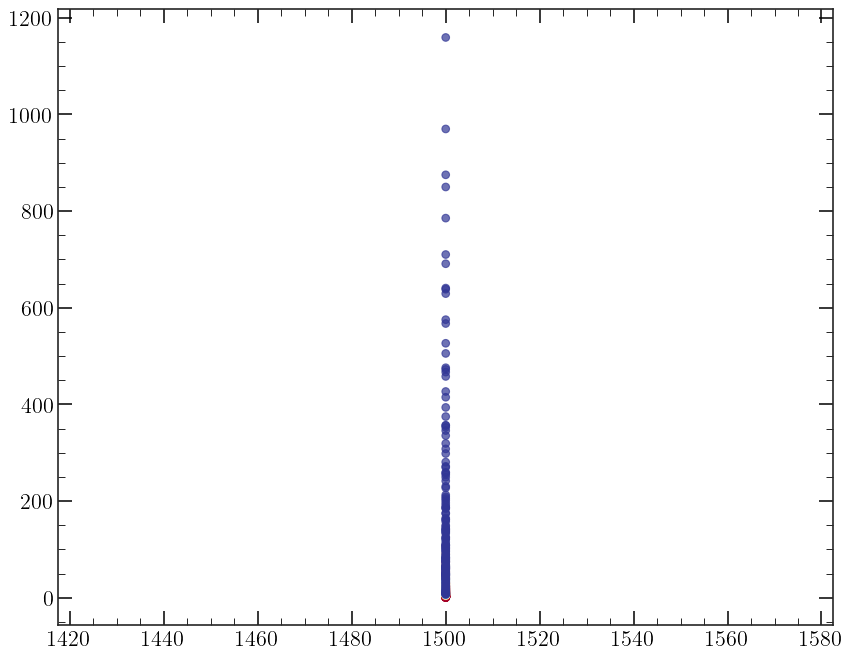

In [25]:
cm = plt.get_cmap('RdYlBu')
fig, ax = plt.subplots(figsize=(10, 8))
configure_axes(ax)
xo = dataDF['mass.5000001']
yo = dataDF['xsec13TeV(fb).5000001'] * (3*dataDF['BRs.y1.q,q'] + dataDF['BRs.y1.c,c'] + dataDF['BRs.y1.b,b'])
co = dataDF['ExptRes.result0.r']
ce = 'ExptRes.result0.r_expected'
order = co.argsort()
xo, yo, co = xo.iloc[order], yo.iloc[order], co.iloc[order]
sc = plt.scatter(xo, yo, c=co, s=30, cmap=cm, vmin=0.6, vmax=1.2, alpha=0.7)
levels = [1.0]  
#cs = ax.tricontour(xo, yo, co, levels=levels, colors='magenta', linestyles='solid', linewidths=2.)
# Grid for interpolation
xi = np.linspace(xo.min(), xo.max(), 1000)
yi = np.linspace(yo.min(), yo.max(), 1000)
xi, yi = np.meshgrid(xi, yi)
# Interpolation
zi = griddata((xo, yo), co, (xi, yi), method='linear')
cs = ax.contour(xi, yi, zi, levels=levels, colors='magenta', linestyles='solid', linewidths=2.)


smodels_proxy = plt.Line2D([0], [0], color='magenta', linewidth=2., linestyle='solid', label='exclusion (SModelS)')
plt.text(0.85, 0.9, r'$j=u,d,c,s,b$', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes, fontsize=20)
observed_line, = ax.plot(MY1_Obs, xsecObs_fb, 'k', linewidth=1, label='exclusion (official)')
plt.legend(handles=[observed_line, smodels_proxy], loc='upper right', framealpha=0.0, fontsize=16, ncol=2)
cbar = plt.colorbar(sc)
configure_cbar(cbar, label=r'$r = \frac{\sigma_{signal}}{\sigma_{U L}}$')
ax.set_x_label(r'$m_{Z^{\prime}}$ [GeV]')
ax.set_y_label(r'$\sigma (p p \to Z^{\prime}) \times BR(Z^{\prime} \to \bar{j} j)$ [fb]')
plt.xlim(1400, 3600)
#plt.yscale('log')
plt.ylim(0, 2e2)
plt.title('ATLAS-EXOT-2019-03 (upper limit) - $\sqrt{s} = 13$ TeV, $L = 136$ fb$^{-1}$', fontsize=16)
#plt.savefig('ATLAS-EXOT-2019-03_SigmaBR_UL.png', dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()

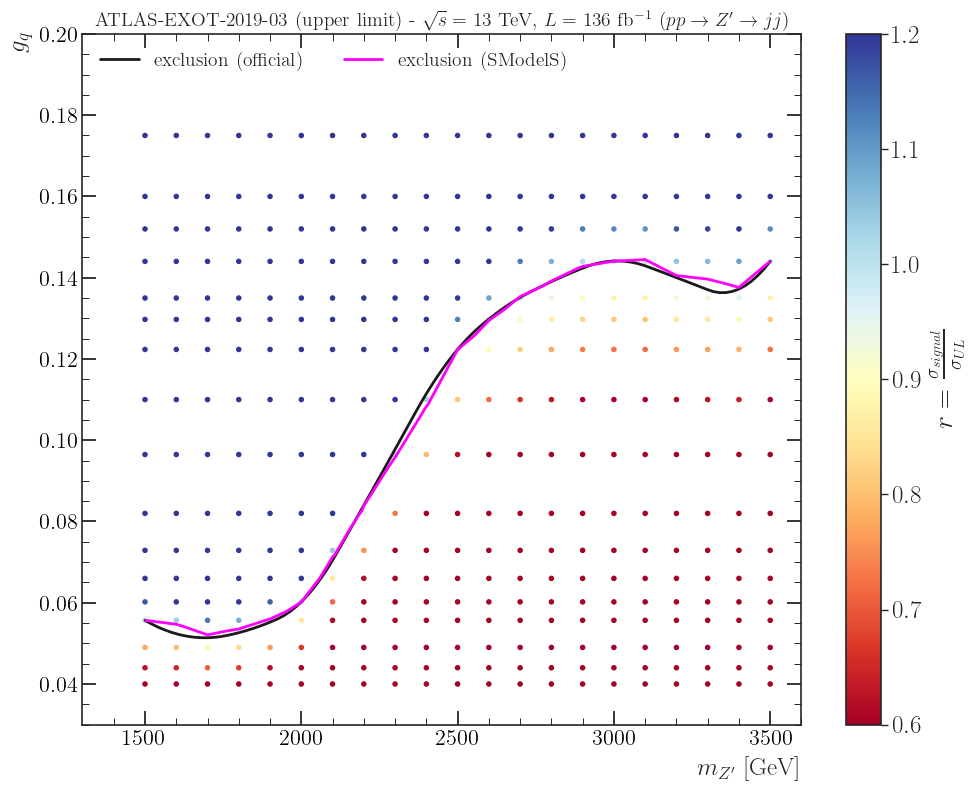

In [17]:
cm = plt.get_cmap('RdYlBu')
fig, ax = plt.subplots(figsize=(10, 8))
configure_axes(ax)
ygq_o = dataDF['extpar.3']
ygq_o = ygq_o.iloc[order]
sc_o = plt.scatter(xo, ygq_o, c=co, s=10, cmap=cm, vmin=6e-1, vmax=1.2e0)
#observed_line, = plt.plot(MY1_Obs, gqObs, 'k', linewidth=2, label='exclusion (official)')
observed_line, = ax.plot(MY1_dense, gqObs_dense, 'k', linewidth=2, label='exclusion (official)')
levels = [1.0]  
cs = plt.tricontour(xo, ygq_o, co, levels=levels, colors='magenta', linestyles='solid', linewidths=2.)
plt.legend(handles=[observed_line, smodels_proxy], loc='upper left', framealpha=0.0, fontsize=14, ncol=2)
cbar = plt.colorbar(sc_o)
configure_cbar(cbar, label=r'$r = \frac{\sigma_{signal}}{\sigma_{U L}}$')
ax.set_x_label(r'$m_{Z^{\prime}}$ [GeV]')
ax.set_y_label(r'$g_{q}$')
plt.xlim(1300, 3600)
plt.ylim(0.03, 0.2)
plt.title(r'ATLAS-EXOT-2019-03 (upper limit) -  $\sqrt{s} = 13$ TeV, $L = 136$ fb$^{-1}$  ($ p p \to Z^{\prime} \to j j$)', fontsize=14) #- Leptophobic $Z^{\prime}$ model (axial-vector)', fontsize=14)
plt.tight_layout()
plt.show()

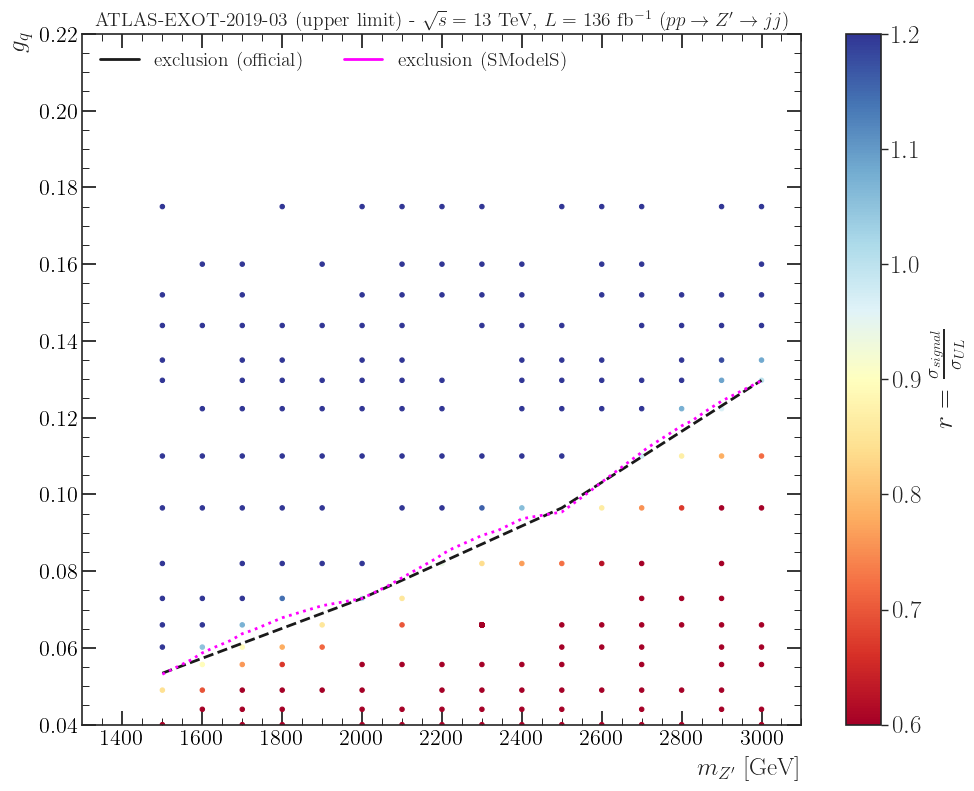

In [18]:
fig, ax = plt.subplots(figsize=(10, 8))
configure_axes(ax)
xe = dataDF['mass.5000001']
ygq_e = dataDF['extpar.3'] 
ce = dataDF['ExptRes.result0.r_expected']
mask_e = np.isfinite(ygq_e) & np.isfinite(ce)

order_e = ce.argsort()
xe, ygq_e, ce = xe.iloc[order_e], ygq_e.iloc[order_e], ce.iloc[order_e]
sc_e = plt.scatter(xe, ygq_e, c=ce, s=10, cmap=cm, vmin=6e-1, vmax=1.2e0)
#expected_line, = plt.plot(MY1_Exp, gqExp, 'k', linewidth=2, label='exclusion (expected)')
expected_line, = ax.plot(MY1_dense2, gqExp_dense, 'k--', linewidth=2, label='exp. excl. (official)')
levels = [1.0]  
#plt.tricontour(xe, ygq_e, ce, levels=levels, colors='magenta', linestyles=':', linewidths=2.)
plt.tricontour(xe[mask_e], ygq_e[mask_e], ce[mask_e], levels=levels, colors='magenta', linestyles=':', linewidths=2.)
expected_line, = expected_line,
plt.legend(handles=[observed_line, smodels_proxy], loc='upper left', framealpha=0.0, fontsize=14, ncol=2)
cbar = plt.colorbar(sc_e)
configure_cbar(cbar, label=r'$r = \frac{\sigma_{signal}}{\sigma_{U L}}$')
ax.set_x_label(r'$m_{Z^{\prime}}$ [GeV]')
ax.set_y_label(r'$g_{q}$')
plt.xlim(1300, 3100)
plt.ylim(0.04, 0.22)
plt.title(r'ATLAS-EXOT-2019-03 (upper limit) - $\sqrt{s} = 13$ TeV, $L = 136$ fb$^{-1}$  ($ p p \to Z^{\prime} \to j j$)', fontsize=14) 
plt.tight_layout()
plt.show()

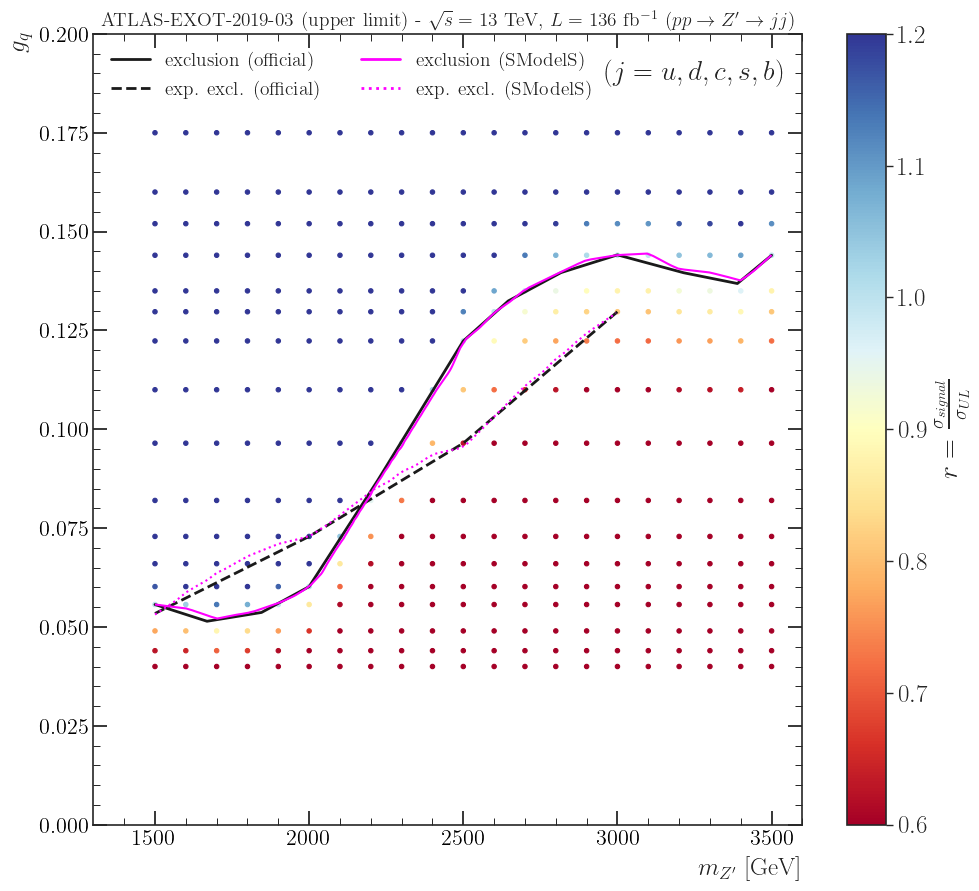

In [19]:
fig, ax = plt.subplots(figsize=(10, 9))
configure_axes(ax)
sc_o = ax.scatter(xo, ygq_o, c=co, s=10, cmap=cm, vmin=6e-1, vmax=1.2e0)
observed_line, = plt.plot(MY1_Obs, gqObs, 'k', linewidth=2, label='exclusion (official)')
expected_line, = plt.plot(MY1_Exp, gqExp, 'k--', linewidth=2, label='exp. excl. (official)')
#observed_line, = ax.plot(MY1_dense, gqObs_dense, 'k', linewidth=2, label='exclusion (official)')
#expected_line, = ax.plot(MY1_dense2, gqExp_dense, 'k--', linewidth=2, label='exp. excl. (official)')
levels = [1.0]  
#plt.tricontour(xo, ygq_o, co, levels=levels, colors='magenta', linestyles='solid', linewidths=2.)
#plt.tricontour(xe[mask_e], ygq_e[mask_e], ce[mask_e], levels=levels, colors='magenta', linestyles=':', linewidths=2.)
# Grid for interpolation
xi = np.linspace(xo.min(), xo.max(), 100)
yi = np.linspace(ygq_o.min(), ygq_o.max(), 3000)
xi, yi = np.meshgrid(xi, yi)
# Interpolation
zi = griddata((xo, ygq_o), co, (xi, yi), method='linear')
# Contour plot
levels = [1.0]  
ax.contour(xi, yi, zi, levels=levels, colors='magenta', linestyles='solid', linewidths=1.5)
# Handling the masked data
zi_masked = griddata((xe[mask_e], ygq_e[mask_e]), ce[mask_e], (xi, yi), method='linear')
plt.contour(xi, yi, zi_masked, levels=levels, colors='magenta', linestyles=':', linewidths=1.5)
smodels_proxygq_e = plt.Line2D([0], [0], color='magenta', linewidth=2., linestyle=':', label='exp. excl. (SModelS)')
smodels_proxy = plt.Line2D([0], [0], color='magenta', linewidth=2., linestyle='solid', label='exclusion (SModelS)')
plt.legend(handles=[observed_line, expected_line, smodels_proxy, smodels_proxygq_e], loc='upper left', framealpha=0.0, fontsize=14,ncol=2)
cbar = plt.colorbar(sc_o)
configure_cbar(cbar, label=r'$r = \frac{\sigma_{signal}}{\sigma_{U L}}$')
ax.set_x_label(r'$m_{Z^{\prime}}$ [GeV]')
ax.set_y_label(r'$g_{q}$')
plt.xlim(1300, 3600)
plt.ylim(0.0, 0.2)
plt.title(r'ATLAS-EXOT-2019-03 (upper limit) -  $\sqrt{s} = 13$ TeV, $L = 136$ fb$^{-1}$  ($ p p \to Z^{\prime} \to j j$)', fontsize=14) 
ax.set_y_label(r'$g_{q}$')
plt.text(0.85, 0.95, r'($j=u,d,c,s,b$)', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes, fontsize=20)
#lt.savefig('ATLAS-EXOT-2019-03_gq_UL.png', dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()

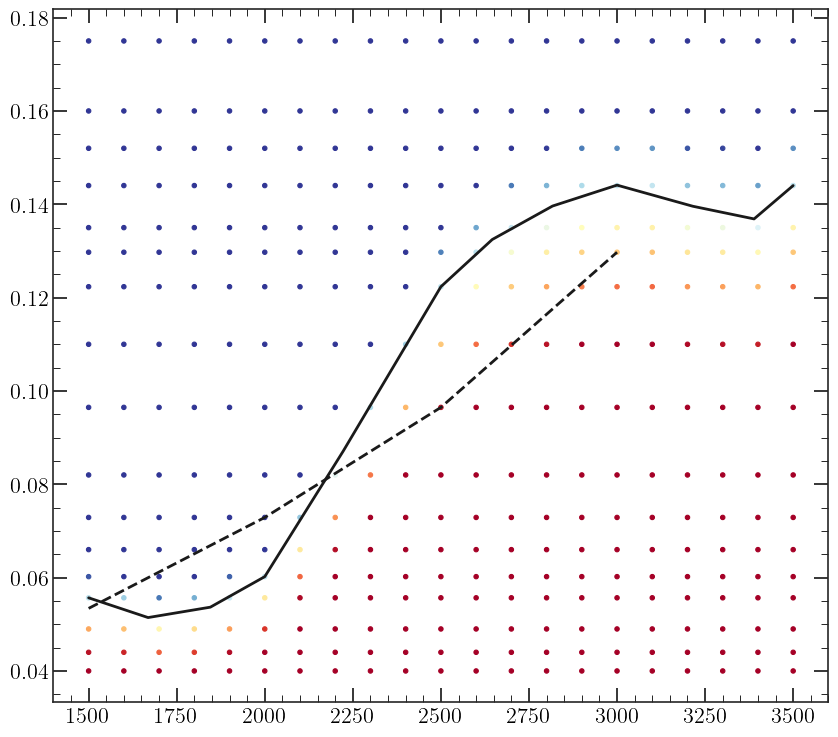

In [20]:
fig, ax = plt.subplots(figsize=(10, 9))
configure_axes(ax)
sc_o = ax.scatter(xo, ygq_o, c=co, s=10, cmap=cm, vmin=6e-1, vmax=1.2e0)
observed_line, = plt.plot(MY1_Obs, gqObs, 'k', linewidth=2, label='exclusion (official)')
expected_line, = plt.plot(MY1_Exp, gqExp, 'k--', linewidth=2, label='exp. excl. (official)')
#observed_line, = ax.plot(MY1_dense, gqObs_dense, 'k', linewidth=2, label='exclusion (official
xi = np.linspace(xo.min(), xo.max(), 2000)
log_yi = np.linspace(np.log10(ygq_o.min()), np.log10(ygq_o.max()), 2000)
xi, log_yi = np.meshgrid(xi, log_yi)
zi = griddata((xo, np.log10(ygq_o)), co, (xi, log_yi), method='cubic')
yi = 10**log_yi

In [21]:
0.1388867*( 3 *1.688592e-01 +1.688585e-01 + 1.688493e-01)

0.11726001306417999

In [22]:
#dataDF[(dataDF['mass.5000001'] == 1.500000e+03) & (dataDF['extpar.3'] == 5.567660E-02)]
 
dataDF['filename'] = 'run_04_MZp_1500_gAq_5.567660E-02.slha'
dataDF['mass.5000001'] = 1500
dataDF['extpar.3'] = 5.567660E-02
dataDF

,filename,mass.5000001,mass.5000521,width.5000001,width.5000521,extpar.1,extpar.2,extpar.3,extpar.4,xsec13TeV(fb).5000001,"BRs.y1.q,q","BRs.y1.c,c","BRs.y1.b,b","BRs.y1.t-,t+",totalxsec13TeV(fb),totalxsec8TeV(fb),SMS Decomposition,Total xsec for missing topologies (fb),Total xsec for missing topologies with displaced decays (fb),Total xsec for missing topologies with prompt decays (fb),Total xsec for topologies outside the grid (fb),OutputStatus.sigmacut,OutputStatus.minmassgap,OutputStatus.maxcond,OutputStatus.ncpus,OutputStatus.model,OutputStatus.promptwidth,OutputStatus.stablewidth,OutputStatus.eraseprompt,OutputStatus.checkinput,OutputStatus.doinvisible,OutputStatus.docompress,OutputStatus.computestatistics,OutputStatus.testcoverage,OutputStatus.combinesrs,OutputStatus.reportallsrs,OutputStatus.experimentalfeatures,OutputStatus.file status,OutputStatus.decomposition status,OutputStatus.warnings,OutputStatus.input file,OutputStatus.database version,OutputStatus.smodels version,ExptRes.result0.maxcond,ExptRes.result0.theory prediction (fb),ExptRes.result0.upper limit (fb),ExptRes.result0.expected upper limit (fb),ExptRes.result0.TxNames,ExptRes.result0.Mass (GeV),ExptRes.result0.AnalysisID,ExptRes.result0.DataSetID,ExptRes.result0.AnalysisSqrts (TeV),ExptRes.result0.lumi (fb-1),ExptRes.result0.dataType,ExptRes.result0.r,ExptRes.result0.r_expected,ExptRes.result0.Width (GeV),excludedLHC
0,run_04_MZp_1500_gAq_5.567660E-02.slha,1500,1.000000e+04,1.131036e-01,0.000000e+00,0.000000e+00,1.500000e+00,5.567660e-02,0.000000e+00,7.172289e+01,1.688592e-01,1.688585e-01,1.688493e-01,1.557145e-01,7.172289e+01,0.000000e+00,"[{'ID': 1, 'SMS': '(PV > y1)', 'Masses (GeV)':...",1.116829e+01,0.000000e+00,7.172288e+01,0.000000e+00,0.000000e+00,50,2.000000e-01,1,TRV1jj_slha/run_01_MZp_1500_gAq_4.000000E-02.slha,1.000000e+00,1.000000e-25,"eCharge,colordim",True,True,True,True,True,False,False,False,1,1,Input file ok,TRV1jj_slha/run_01_MZp_1500_gAq_4.000000E-02.slha,3.0.0-beta,3.0.0-beta,0.000000e+00,6.055459e+01,1.172950e+02,1.079320e+02,[TRV1jj],"[(y1, 1500.0)]",ATLAS-EXOT-2019-03,None,1.300000e+01,1.390000e+02,upperLimit,5.162589e-01,5.610439e-01,"[(y1, 0.1131)]",False
1,run_04_MZp_1500_gAq_5.567660E-02.slha,1500,1.000000e+04,6.373773e-01,0.000000e+00,0.000000e+00,1.500000e+00,5.567660e-02,0.000000e+00,7.108620e+01,1.679002e-01,1.678998e-01,1.678947e-01,1.605049e-01,7.108620e+01,0.000000e+00,"[{'ID': 1, 'SMS': '(PV > y1)', 'Masses (GeV)':...",1.140968e+01,0.000000e+00,7.108620e+01,0.000000e+00,0.000000e+00,50,2.000000e-01,1,TRV1jj_slha/run_01_MZp_1500_gAq_4.000000E-02.slha,1.000000e+00,1.000000e-25,"eCharge,colordim",True,True,True,True,True,False,False,False,1,1,Input file ok,TRV1jj_slha/run_83_MZp_2000_gAq_8.200000E-02.slha,3.0.0-beta,3.0.0-beta,0.000000e+00,5.967652e+01,3.215460e+01,4.719660e+01,[TRV1jj],"[(y1, 2000.0)]",ATLAS-EXOT-2019-03,None,1.300000e+01,1.390000e+02,upperLimit,1.855925e+00,1.264424e+00,"[(y1, 0.63738)]",True
2,run_04_MZp_1500_gAq_5.567660E-02.slha,1500,1.000000e+04,1.373590e+00,0.000000e+00,0.000000e+00,1.500000e+00,5.567660e-02,0.000000e+00,7.109599e+00,1.671801e-01,1.671800e-01,1.671778e-01,1.641017e-01,7.109599e+00,0.000000e+00,"[{'ID': 1, 'SMS': '(PV > y1(1)), (y1(1) > q,q)...",1.166697e+00,0.000000e+00,7.109598e+00,0.000000e+00,0.000000e+00,50,2.000000e-01,1,TRV1jj_slha/run_01_MZp_1500_gAq_4.000000E-02.slha,1.000000e+00,1.000000e-25,"eCharge,colordim",True,True,True,True,True,False,False,False,1,1,Input file ok,TRV1jj_slha/run_249_MZp_3100_gAq_9.648170E-02....,3.0.0-beta,3.0.0-beta,0.000000e+00,5.942900e+00,1.330300e+01,NaN,[TRV1jj],"[(y1, 3100.0)]",ATLAS-EXOT-2019-03,None,1.300000e+01,1.390000e+02,upperLimit,4.467338e-01,NaN,"[(y1, 1.3736)]",False
3,run_04_MZp_1500_gAq_5.567660E-02.slha,1500,1.000000e+04,3.654906e+00,0.000000e+00,0.000000e+00,1.500000e+00,5.567660e-02,0.000000e+00,2.435588e+01,1.672149e-01,1.672148e-01,1.672125e-01,1.639279e-01,2.435588e+01,0.000000e+00,"[{'ID': 1, 'SMS': '(PV > y1(1)), (y1(1) > q,q

In [23]:
(1.670695e-01+ 1.670695e-01 +  1.670695e-01+ 1.670694e-01+ 1.670677e-01)* 0.006649833 

0.005554908737284801